In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight

In [2]:
df = pd.read_csv('../data/wine_quality_modelos3.csv')
df

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,baja,media,alta,quality_category,quality_category_int,wine_type_int
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0,0,baja,0,0
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0,0,baja,0,0
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0,0,baja,0,0
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1,0,media,1,0
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0,0,baja,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1,0,media,1,1
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0,0,baja,0,1
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1,0,media,1,1
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1,0,media,1,1


In [3]:
st_scaler = StandardScaler()

# Separamos las features de las etiquetas 
X = df[['volatile acidity','chlorides','density','alcohol']]
y = df['wine_type_int']

# Escalamos los datos
X_scaled = st_scaler.fit_transform(X)


In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size = 0.2, random_state = 10, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10, stratify=y_temp)

In [6]:
capas = [
    keras.layers.Flatten(input_dim=4),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 2, activation='sigmoid')
]

model_neuronal = keras.models.Sequential(capas)

model_neuronal.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model_neuronal.summary()

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

history = model_neuronal.fit(
    X_train,
    y_train,
    class_weight=class_weights_dict,
    batch_size = 32,
    epochs = 100,
    validation_data = (X_valid, y_valid) # validation_split = 0.1
)

results = model_neuronal.evaluate(X_test, y_test)
results

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           602 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,102 (8.21 KB)

 Trainable params: 2,102 (8.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7628 - loss: 0.5731 - val_accuracy: 0.9231 - val_loss: 0.3774
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9215 - loss: 0.3286 - val_accuracy: 0.9338 - val_loss: 0.2814
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9288 - loss: 0.2630 - val_accuracy: 0.9369 - val_loss: 0.2384
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9350 - loss: 0.2214 - val_accuracy: 0.9400 - val_loss: 0.2147
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9333 - loss: 0.2049 - val_accuracy: 0.9446 - val_loss: 0.2000
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9412 - loss: 0.1919 - val_accuracy: 0.9477 - val_loss: 0.1884
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9436 - loss: 0.1784 - val_accuracy: 0.9477 - val_loss: 0.1785
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9422 - loss: 0.1698 - val_accu

[0.10834068059921265, 0.9599999785423279]

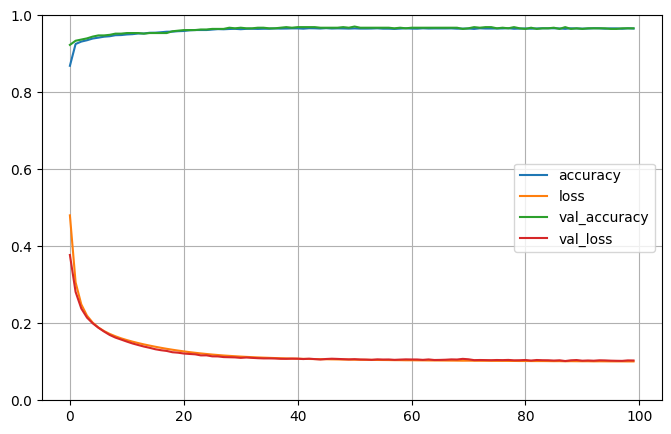

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [8]:
predictions = model_neuronal.predict(X_test)
predictions

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.043024  , 0.95592767],
       [0.87601656, 0.12498648],
       [0.98479867, 0.01210486],
       ...,
       [0.01657525, 0.98377645],
       [0.06823112, 0.9406142 ],
       [0.04260765, 0.95806676]], dtype=float32)

In [11]:
cm = confusion_matrix(y_test, model_neuronal.predict(X_test).argmax(axis=1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


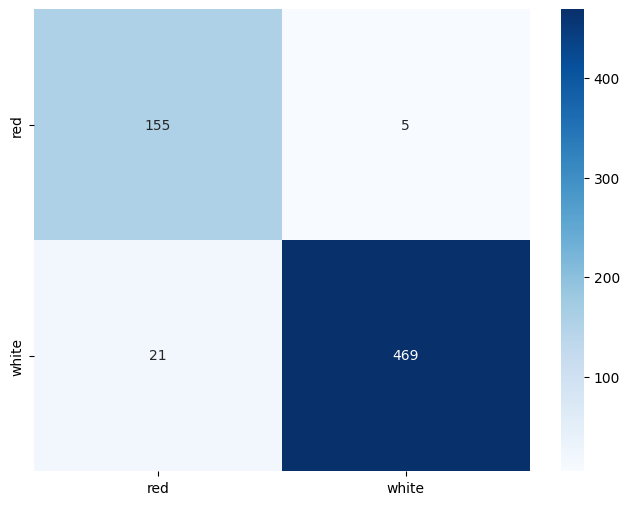

In [ ]:
# Matriz de confusion
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    cm, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['red', 'white'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['red', 'white'] # Nombres de clases 
)

In [10]:
print(classification_report(y_test, model_neuronal.predict(X_test).argmax(axis=1)))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       160
           1       0.99      0.96      0.97       490

    accuracy                           0.96       650
   macro avg       0.94      0.96      0.95       650
weighted avg       0.96      0.96      0.96       650

